In [54]:
!pwd

/Users/soon/workspace/python/ml_basic/about_python


In [55]:
!ls ../img/overfitting_hunkim.png

../img/overfitting_hunkim.png


## overfitting, under fitting
- over fitting
 : Training 데이터 셋 안에서는 정말 정확히 동작하는데 다른 데이터에 대해서는 엉뚱한 동작을 하게 되는 것

참고
![asdfasdf](../img/overfitting_hunkim.png)

위 그림에서 보듯이 두번째 그림에는 너무 training data에 맞춰서 선이 구부러져 있는데, 이렇게 도출된 모델은 다른 데이터가 들어왔을때 똑같은 모델이 되리라는 보장을 할 수 없다. 즉, 일반화에서 멀어진 현상을 이야기함.

## 여기서는 overfitting을
- Reducing the network's size  
network의 사이즈를 줄여나가는 방식  
- weight regularization  
가중치가 일정 범위안에서만 존재하도록 제한하는 방식  
- adding dropout  
랜덤하게 0을 대입하는 방식...  
을 수행해서 overfitting을 줄여나간다.

## Reducing the network's size
network 갯수를 줄이는 것이다.  
결론적으로 쉽게 이야기하면, layer의 수를 얼마나 잡을지를 결정할 수 있는 함수는 없다. 따라서 직접 돌려보면서 network의 사이즈를 줄이거나 늘려야 한다는 이야기를 하려고 하는데 그 근거와 예를 들기 위해 길게 설명합니다. 

딥러닝에서는 학습 가능한 파라미터들의 갯수를 'capacity'라고 부른다. 직관적으로, 하나의 모델에 더 많은 parameter들이 더 많은 'memorization capacity'를 가지게 되고 그럼으로 인해서 training sample과 대상간에 dictionary와 같은 형태의 매핑형태로 쉽게 배울 수 있다.  
  
하지만 네트워크의 memorization resource들을 제한적으로 가지고있다면 mapping을 쉽게 배울 수 없는데, 이런 것으로 인해 loss를 줄이기 위해 target에 대한 예측력을 가진 압축된 representation을 학습해야 한다.이 압축된 representation을 정확하게 우리가 관심을 가지는 representation의 유형이라고 하네요...  
  
아쉽게도 마법과 같은 함수가 없는 없다고 함. 올바른 수의 layer가 무엇인지 또는 각 layer의 크기가 적절한지를 결정하는 마법과 같은 공식은 없다. 데이터에 맞는 모델 크기를 찾으려면 다양한 아키텍처의 배열을 검증해야 한다.(test set이 아닌 validation set에서)  
  
적절한 모델의 크기를 찾는 일반적인 워크 플로우는 **비교적 적은수의 레이어**와 **적은 수의 매개변수**로 시작해서 validation loss과 관련하여 **return이 줄어드는 것(unitil you see diminishing returns)을 볼때까지** layer의 크기를 늘리거나 새 layer를 추가하는 것이다.  
  
머신러닝과의 비교: http://pythonkim.tistory.com/42 [파이쿵]  
머신러닝에서는 training data를 늘리거나, feature의 갯수를 줄이거나, dropout을 사용한다. feature의 갯수를 줄일때, 여기서 설명하는 것처럼 sigmoid, relu의 방식을 설명하는데, 더 좋은 방법은 dropout이라고 함.     
  
예제)  
network의 사이즈를 지정하고 train data와 test data에 대한 validation 데이터를 얻어내는 예제  
```code
from keras import models
from keras import layers

## model 세팅(layer, activation 등)
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

## 얻어낸 original_model의 activiation과 layer 정보를 통해 loss를 binary_crossentropy방식으로 컴파일
original_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

## original_hist :: 실제 계산 (학습데이터, 테스트 데이터를 통해 validation_loss등을 계산)
original_hist = original_model.fit(x_train, y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))

## 계산한 validation_loss를 얻어낸다.
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

## 그래프에 표현
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()
```


## weight regularization
overfitting을 완화하는 일반적인 방법은 가중치(cost가 작은 값을 가지도록 만들어서 네트워크의 complexity 에 제한점을 두는 것(to put constraints)이다. 이렇게 하면 가중치값의 분포를 조금 더 regular, 즉 정규화할수 있다. 이러한 방식을 가중치 정규화라 한다. 
  
keras에서는 아래와 같이 두가지의 가중치를 구하는 방식이 있다.    
- L1 regularization :  
    여기서 추가된 cost는 가중치 상관계수의 절대값에 비례한다.  
- L2 regularization :  
    여기서 추가된 cost는 가중치의 상관계수의 제곱에 피례한다. (예를 들어 가중치의 L2 norm 이라고 불린다.)  
    L2 regularization은 신경 네트워크의 맥락에서(in the context of neural networks), 체중 감량(weight decay)라고도 한다.  

예제)
아래와 같이 kernel_regularizer라는 keyword argument의 value로 regularizers.l2(number)를 대입하는 것으로 간단히 해결되는 듯하다.    
```code
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
```

## weight regularization in keras
케라스에서는 weight_regularizer 인스턴스들을 keyword argument로 전달 가능하다.
아래의 코드는 movie review classification network 에 L2 weight rgularization을 더하는 코드다.
ex)
```code
from keras import regularizers

l2_model = models.Sequential()

l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
```
regularization에 대한 쉬운 설명 참고
http://pythonkim.tistory.com/23 [파이쿵]



**12(0.001)의 의미**
l2 (0.001)는 계층의 가중치 행렬에 있는 모든 상관계수가 0.001 * weight_coefficient_value를 네트워크의 전체 손실에 더한다는 것. 주의할 것은 이런 페널티는 오직 training time에만 더할 수 있기 때문에, 이 network의 loss는 test time에서의 loss보다 training time에서의 loss가 훨씬 커진다.

## Adding dropout
- 신경망 네트워크에서 흔히 쓰이는 정규화 방법(regularization techniques)중의 하나.  
토론토 대학의 Hinton과 그의 학생들의 노가다로 구해졌다고 함.  
- 계층에 적용되는 dropout은, training time 동안 layer의 다수의 output feature들을 "dropout"(0으로 세팅)으로 구성한다고 함.  
- 의역) 즉, training time동안 layer의 다수의 output feature들을 0으로 세팅하는데 이렇게 0으로 세팅하는 것을 drop out이라 함.
- 예를 들면 \[0.2, 0.5, 1.3, 0.8, 1.1\] 을 \[0, 0.5, 1.3, 0, 1.1\]로 바꿔줌
- **"드롭아웃비율(dropout rate)"**
zero-out 되는 feature들의 비율(the fraction of being zeroed-out)이다.  
(미안합니다. 요건 구글 번역입니다.) 일반적으로 0.2와 0.5 사이에 설정됩니다. 테스트 시간에는 단위가 제거되지 않고 레이어의 출력 값이 드롭 아웃 비율과 같은 비율로 축소되므로 교육 시간보다 더 많은 단위가 활성화되어 있다는 사실에 균형을 맞출 수 있습니다.  
  
Numpy 행렬이 layer의 output인 layer_output을 포함하고 있다고 가정하자. 학습 시간(training time)에 우리는 무작위로 행렬(matrix)의 값의 일부를 zero-out할 것이다.  
  
```code
layer_output *= np.randint(0, high=2. size=layer_output.shape)
```
```code
low : int  
    Lowest(singned) integer to be drawn from the distribution  
high : int, optimal
    If provided, one above the largest (signed) integer to be drawn from the distribution  
```
  

## Training data 준비

In [1]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import imdb
import numpy as np

# https://s3.amazonaws.com/text-datasets/imdb.npz에서 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [10]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [13]:
# 각 데이타(train_data, test_data)는 x변수(x_train, x_test)
# 각 label들은 y변수(y_train, y_test)

# Our vectorized training data
x_train = vectorize_sequence(train_data)
# Our vectorized test data
x_test = vectorize_sequence(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Reducing the network's size

In [26]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

위의 것을 작은 네트워크로 바꿔보면

In [27]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## original network와 smaller network간의 validation loss를 비교해본다.  
**original_hist**에는 original network를  
**smaller_model_hist**에는 smaller network를 담는다.  

In [28]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 11s 446us/step - loss: 0.4709 - acc: 0.8208 - val_loss: 0.3465 - val_acc: 0.8810
Epoch 2/20
25000/25000 [==============================] - 10s 411us/step - loss: 0.2653 - acc: 0.9098 - val_loss: 0.2951 - val_acc: 0.8846
Epoch 3/20
25000/25000 [==============================] - 7s 272us/step - loss: 0.2054 - acc: 0.9256 - val_loss: 0.2783 - val_acc: 0.8900
Epoch 4/20
25000/25000 [==============================] - 7s 267us/step - loss: 0.1701 - acc: 0.9400 - val_loss: 0.2921 - val_acc: 0.8849
Epoch 5/20
25000/25000 [==============================] - 6s 248us/step - loss: 0.1449 - acc: 0.9494 - val_loss: 0.3064 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 6s 248us/step - loss: 0.1279 - acc: 0.9560 - val_loss: 0.3457 - val_acc: 0.8723
Epoch 7/20
25000/25000 [==============================] - 6s 248us/step - loss: 0.1148 - acc: 0.9610 - val_loss: 0.3837 

In [29]:
smaller_model_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 403us/step - loss: 0.5605 - acc: 0.8101 - val_loss: 0.4690 - val_acc: 0.8594
Epoch 2/20
25000/25000 [==============================] - 8s 330us/step - loss: 0.3872 - acc: 0.8851 - val_loss: 0.3679 - val_acc: 0.8758
Epoch 3/20
25000/25000 [==============================] - 5s 209us/step - loss: 0.2976 - acc: 0.9064 - val_loss: 0.3150 - val_acc: 0.8858
Epoch 4/20
25000/25000 [==============================] - 6s 236us/step - loss: 0.2457 - acc: 0.9192 - val_loss: 0.2907 - val_acc: 0.8896
Epoch 5/20
25000/25000 [==============================] - 6s 243us/step - loss: 0.2122 - acc: 0.9278 - val_loss: 0.2803 - val_acc: 0.8902
Epoch 6/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.1887 - acc: 0.9346 - val_loss: 0.2780 - val_acc: 0.8906
Epoch 7/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.1713 - acc: 0.9408 - val_loss: 0.2798 -

In [33]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

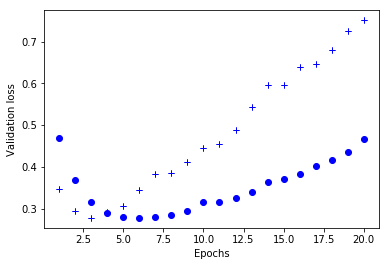

In [36]:
import matplotlib.pyplot as plt

# b+ is for 'blue cross'
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for 'blue dot'
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs') # running step...
plt.ylabel('Validation loss') # Validation 손실

plt.show()

```code
+ : Original model
. : Smaller model
```
4에서 6사이에서 smaller network가 overfitting을 하기 시작하고  
이것(validation loss)의 성능(performance)은 overfitting을 시작하면서부터 현저하게 느려진다.  
  
Now, for kicks, 벤치마크에 문제가 허용하는 것보다 훨씬 많은 용량을 가진 네트워크를 추가해보면 아래와 같다.  

In [37]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

## bigger_model의 loss를 'binary_crossentropy'로 compile 하고, bigger_model_hist에 fit 시킴

In [43]:
bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [42]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 37s 1ms/step - loss: 0.4668 - acc: 0.7938 - val_loss: 0.3724 - val_acc: 0.8298
Epoch 2/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2220 - acc: 0.9119 - val_loss: 0.2870 - val_acc: 0.8853
Epoch 3/20
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1292 - acc: 0.9523 - val_loss: 0.3339 - val_acc: 0.8822
Epoch 4/20
25000/25000 [==============================] - 29s 1ms/step - loss: 0.0677 - acc: 0.9815 - val_loss: 0.4298 - val_acc: 0.8829
Epoch 5/20
25000/25000 [==============================] - 31s 1ms/step - loss: 0.0399 - acc: 0.9892 - val_loss: 0.5364 - val_acc: 0.8808
Epoch 6/20
25000/25000 [==============================] - 29s 1ms/step - loss: 0.0534 - acc: 0.9888 - val_loss: 0.5685 - val_acc: 0.8826
Epoch 7/20
25000/25000 [==============================] - 26s 1ms/step - loss: 0.0732 - acc: 0.9915 - val_loss: 0.8411 - val_acc

## binary_crossentropy로 컴파일한 bigger_model_hist의 loss(손실)만을 따로 담은후, 그래프로 표현해보면..

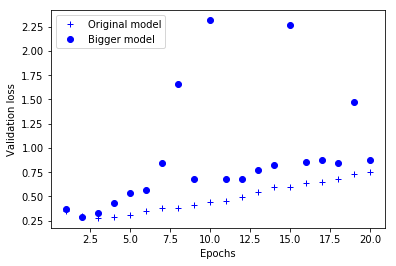

In [50]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

위 그림을 보면 overfitting을 거의 one epoch(거의 1)부터 시작하는 것을 볼수 있다. validation loss가 굉장이 노이즈가 많이 낀것으로 보임.

여기까지의 정리를 해보면 우리는 overfitting을 줄이기 위한 방법들 세가지  
(네트워크 사이즈 줄이기,가중치 정규화, 네트워크 사이즈 줄이기)중에 **네트워크의 사이즈 줄이기**를 하고 있고, bigger model의 overfitting이 굉장히 크다는 것을 확인 가능하다.

## 두 네트워크의 training loss (학습손실)을 아래에 표시해보면

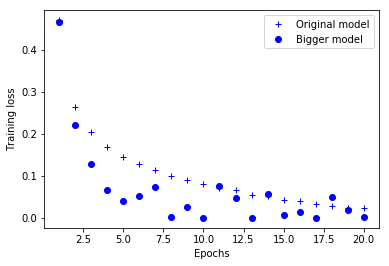

In [58]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label = 'Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

training losss가 0에 굉장히 빠르게 가까워지는 것을 확인할 수 있다. 네트워크가 더 많은 capacity를 가지면, training data를 모델링 할 수 있으므로(train loss가 적으므로) 빠른 모델링이 가능하지만, 과도하게 적용되면 위와 같이 training loss와 validation loss가 크게 다르게 된다.

## Adding weight regularization

overfitting을 완화하는 일반적인 방법은 가중치(cost가 작은 값을 가지도록 만들어서 네트워크의 complexity 에 제한점을 두는 것(to put constraints)이다. 이렇게 하면 가중치값의 분포를 조금 더 regular, 즉 정규화할수 있다. 이러한 방식을 가중치 정규화라 한다.
- L1 regularization : 여기서 추가된 cost는 가중치 상관계수의 절대값에 비례한다.
- L2 regularization : 여기서 추가된 cost는 가중치의 상관계수의 제곱에 피례한다.  (예를 들어 가중치의 L2 norm 이라고 불린다.) L2 정규화는 신경 네트워크의 맥락에서(in the context of neural networks), 체중 감량(weight decay)라고도 한다.

## 여기서는..
L2 regularization을 사용

In [60]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

## l2_model 적용
네트워크의 사이즈는 12 이면서, 'relu'가 적용된 l2_model을 loss는 'binary_crossentropy'로 해서 컴파일한 것을 fitting한 후의 결과룰 표시해본다.

In [62]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 15s 593us/step - loss: 0.4969 - acc: 0.8175 - val_loss: 0.3893 - val_acc: 0.8726
Epoch 2/20
25000/25000 [==============================] - 12s 499us/step - loss: 0.3182 - acc: 0.9036 - val_loss: 0.3337 - val_acc: 0.8898
Epoch 3/20
25000/25000 [==============================] - 10s 406us/step - loss: 0.2744 - acc: 0.9182 - val_loss: 0.3295 - val_acc: 0.8882
Epoch 4/20
25000/25000 [==============================] - 8s 312us/step - loss: 0.2523 - acc: 0.9271 - val_loss: 0.3517 - val_acc: 0.8772
Epoch 5/20
25000/25000 [==============================] - 11s 438us/step - loss: 0.2369 - acc: 0.9339 - val_loss: 0.3368 - val_acc: 0.8852
Epoch 6/20
25000/25000 [==============================] - 8s 338us/step - loss: 0.2278 - acc: 0.9367 - val_loss: 0.3670 - val_acc: 0.8732
Epoch 7/20
25000/25000 [==============================] - 10s 411us/step - loss: 0.2194 - acc: 0.9404 - val_loss: 0.35

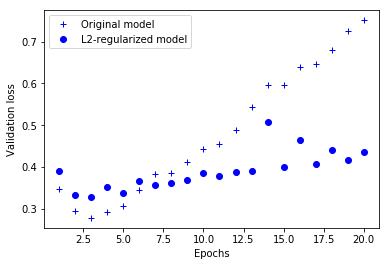

In [63]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


자세히 보면 +와 o이 만나는 지점이 조금더 먼 지점에서 교차하게 되는 것을 확인 가능하다. 위와 같은 L2 regularization외에도 L1 regularization의 예제는 아래와 같다.

In [67]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)


# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## DROP OUT 은 포기...